<a href="https://colab.research.google.com/github/DanteBM/Aprendizaje-Profundo/blob/main/tareas/tarea1/tarea1c_ap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 3: compuerta XOR
> Entrena una red completamente conectada para aproximar la compuerta XOR. Puedes usar todas las herramientas de PyTorch. (3 puntos)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import numpy as np

from sklearn.model_selection import train_test_split

import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
X = torch.rand(100,2).round() # features binarios
y = torch.where(X[:,0] == X[:,1], 0, 1).view(-1,1).type(torch.float32) # XOR
X.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8)

In [ ]:
dataset_train = TensorDataset(X_train,y_train)
dataset_test = TensorDataset(X_test, y_test)

In [ ]:
# tamaño del lote
batch_size = 10

# creamos un DataLoader
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

In [ ]:
# optimizador
def train(model, dl, epochs=5, verbose=False):
    opt = optim.SGD(model.parameters(), lr=1e-3)

    # historial de pérdida
    loss_hist = []
    loss_list = []

    # ciclo de entrenamiento
    for epoch in range(epochs):
        # historial
        loss_hist = []
        
        # entrenamiento de una época
        for x, y_true in dl:
            y_lgts = model(x)  # hacemos inferencia para obtener los logits
            loss = F.binary_cross_entropy(y_lgts, y_true)  # calculamos de pérdida
            opt.zero_grad()  # vaciamos los gradientes
            loss.backward() # retropropagamos
            opt.step() # actulizamos parámetros

            loss_hist.append(loss.item() * 100) # guardamos historial de pérdida
            
        # imprimimos la pérdida de la época
        loss = np.mean(loss_hist)
        loss_list.append(loss)
        if verbose:
            print(f'E{epoch:02} loss=[{loss:6.2f}]')
    
    return loss_list

In [ ]:
dataloader_train.batch_size

10

In [ ]:
len(dataloader_train)

8

In [ ]:
def eval_model(model, dl):
    with torch.no_grad():
        loss_list = []
        accuracy_count = 0
        for x, y_true in dl:
            y_lgts = model(x)
            loss = F.binary_cross_entropy(y_lgts, y_true)
            loss_list.append(loss)
            
            y_pred = y_lgts.round()
            accuracy_count += (y_pred == y_true).sum()
        
        accuracy = accuracy_count/(len(dl)*(dl.batch_size))
        mean_loss = np.mean(loss_list)
        
        return accuracy, mean_loss

## Propuesta minimalista

In [ ]:
model1 = nn.Sequential(
    nn.Linear(2,25),
    nn.Sigmoid(),
    nn.Linear(25,1),
    nn.Sigmoid()
)

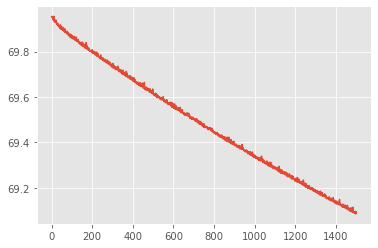

In [ ]:
loss_hist = train(model1, dataloader_train, epochs=1500)
plt.plot(np.arange(1,len(loss_hist)+1),loss_hist)

In [ ]:
eval_model(model1, dataloader_test)

(tensor(0.3500), 0.7116779)

## Otra propuesta

In [ ]:
model2 = nn.Sequential(
    nn.Linear(2,25),
    nn.ReLU(),
    nn.Linear(25,12),
    nn.ReLU(),
    nn.Linear(12,1),
    nn.Sigmoid()
)

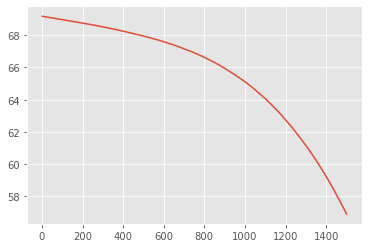

In [ ]:
loss_hist = train(model2, dataloader_train, epochs=1500)
plt.plot(np.arange(1,len(loss_hist)+1),loss_hist)

In [ ]:
eval_model(model2, dataloader_test)

(tensor(1.), 0.5734221)

-------------
Para la misma cantidad de épocas, el segundo modelo obtuvo un mejor desempeño, debido posiblemente a que hace uso de más capas y de la función de activación ReLU (ayuda al descenso del gradiente).

Algo interesante a notar, es que el primer modelo seguramente puede mejorar su desempeño si se le deja una mayor cantidad de épocas, sin embargo, se puede notar una especie de ruido en su trayectoria, fenómeno que no sucede con el segundo modelo